In [1]:
# Filenames
import os
# Regex
import re
# Plotting
import matplotlib
import matplotlib.pyplot as plt
# Dataframes
import pandas as pd
# Tokenize language
import nltk

In [2]:
top_N = 150

In [3]:
# Get the list of all files and directories
path = "comments"
dir_list = os.listdir(path)
print(len(dir_list))

403


In [4]:
dfs = []
for filename in dir_list:
    if filename.startswith("comments"):
        df=pd.read_csv(f"comments/{filename}", delimiter=";",header=1,
                 usecols=['Comment'])
        dfs.append(df)
print(len(dfs))

401


In [5]:
all_comments_df = pd.concat(dfs, axis=0)

In [6]:
txt = all_comments_df.Comment.str.lower().str.cat(sep=' ')
# Remove all non-wordy characters
txt = re.sub(r"[^a-zA-Z0-9 ]", "", txt)

In [7]:
#nltk.download()
words = nltk.tokenize.word_tokenize(txt, language="german")
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('german')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

All frequencies, including STOPWORDS:
                   Word  Frequency
0                   und      29962
1                   die      25684
2                   ich      22003
3                   das      18499
4                   der      17356
5                    es      16064
6                    in      14481
7                   ist      14215
8                 nicht      13586
9                    zu      12234
10                 auch      10931
11                   so      10198
12                   fr       8394
13                  den       8297
14                  mit       8191
15                 dass       8174
16                  sie       7729
17                  von       7686
18                  ein       7519
19                  wie       6940
20               sophie       6886
21                  auf       6408
22                  man       6407
23                   du       6167
24                 aber       6111
25                 eine       5765
26               

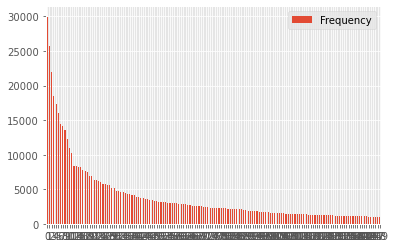

In [8]:
pd.set_option('display.max_rows', None)
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)
print('=' * 60)

All frequencies, NOT including STOPWORDS:
                   Word  Frequency
0                    fr       8394
1                sophie       6886
2                    ja       4175
3               projekt       3247
4                 danke       3218
5              menschen       3133
6                 immer       3037
7                 liebe       3018
8                 schon       2889
9                scholl       2790
10   ichbinsophiescholl       2725
11                 zeit       2599
12                 mehr       2572
13                  mal       2294
14                  ber       2252
15                  gut       2239
16                wurde       2209
17           geschichte       2107
18                heute       2073
19                 ganz       1892
20                 gibt       1801
21                leben       1782
22              einfach       1748
23                finde       1614
24                 wrde       1571
25               vielen       1537
26           

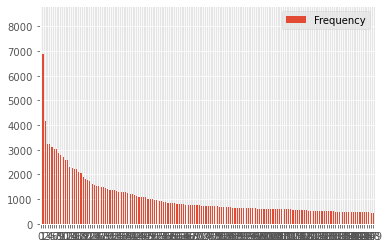

In [9]:
print('All frequencies, NOT including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)
print('=' * 60)
